In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# daatset api
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 82% 134M/163M [00:00<00:00, 1.40GB/s]
100% 163M/163M [00:00<00:00, 1.26GB/s]


In [7]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2557.jpg', 'with_mask_620.jpg', 'with_mask_582.jpg', 'with_mask_1856.jpg', 'with_mask_3387.jpg']
['with_mask_675.jpg', 'with_mask_2910.jpg', 'with_mask_1618.jpg', 'with_mask_138.jpg', 'with_mask_458.jpg']


In [11]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2594.jpg', 'without_mask_1787.jpg', 'without_mask_349.jpg', 'without_mask_3577.jpg', 'without_mask_1058.jpg']
['without_mask_3361.jpg', 'without_mask_2575.jpg', 'without_mask_1568.jpg', 'without_mask_2415.jpg', 'without_mask_1924.jpg']


In [12]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


In [13]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [14]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [15]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [16]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


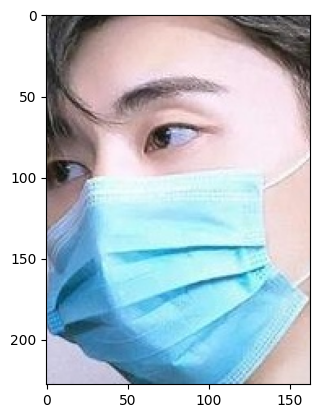

In [17]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

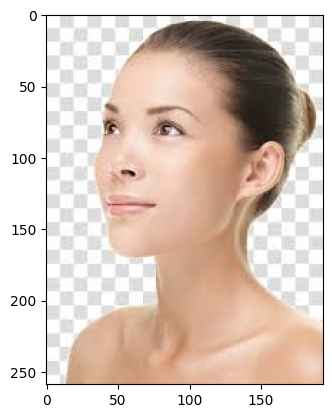

In [18]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

In [19]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [20]:
type(data)

list

In [21]:
len(data)

7553

array([[[225, 201, 167],
        [225, 199, 166],
        [210, 183, 150],
        ...,
        [254, 229, 196],
        [255, 237, 213],
        [249, 235, 216]],

       [[227, 203, 169],
        [225, 200, 166],
        [210, 183, 150],
        ...,
        [250, 226, 192],
        [250, 233, 208],
        [248, 235, 216]],

       [[220, 196, 162],
        [220, 195, 161],
        [204, 177, 144],
        ...,
        [250, 226, 193],
        [250, 235, 211],
        [249, 238, 220]],

       ...,

       [[ 10,  73, 160],
        [ 15,  67, 147],
        [ 34,  71, 137],
        ...,
        [ 45,  77, 157],
        [ 37,  71, 152],
        [ 17,  52, 134]],

       [[ 26, 112, 216],
        [ 42, 115, 210],
        [ 25,  78, 156],
        ...,
        [ 10,  46, 125],
        [ 15,  50, 126],
        [  2,  29, 101]],

       [[ 12, 101, 215],
        [ 31, 111, 214],
        [ 14,  76, 162],
        ...,
        [ 14,  53, 131],
        [ 14,  48, 115],
        [  1,  18,  79]]], dtype=uint8)
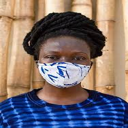

In [22]:
data[0]

In [23]:
type(data[0])

numpy.ndarray

In [24]:
data[0].shape

(128, 128, 3)

In [25]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [26]:
type(X)

numpy.ndarray

In [27]:
type(Y)

numpy.ndarray

In [28]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [29]:
print(Y)

[1 1 1 ... 0 0 0]


In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [32]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[237, 234, 231],
        [233, 229, 224],
        [205, 201, 190],
        ...,
        [253, 250, 242],
        [239, 237, 228],
        [228, 226, 215]],

       [[230, 227, 222],
        [225, 220, 214],
        [186, 180, 170],
        ...,
        [255, 254, 250],
        [250, 250, 245],
        [246, 245, 234]],

       [[223, 219, 211],
        [196, 189, 180],
        [157, 147, 135],
        ...,
        [253, 251, 248],
        [253, 252, 248],
        [255, 252, 247]]], dtype=uint8)
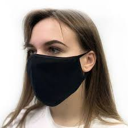

In [33]:
X_train[0]

In [34]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.92941176, 0.91764706, 0.90588235],
        [0.91372549, 0.89803922, 0.87843137],
        [0.80392157, 0

In [35]:
import tensorflow as tf
from tensorflow import keras

In [36]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 146s 834ms/step - acc: 0.6684 - loss: 0.7731 - val_acc: 0.8893 - val_loss: 0.2806
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 205s 854ms/step - acc: 0.8772 - loss: 0.3047 - val_acc: 0.8992 - val_loss: 0.2735
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 195s 811ms/step - acc: 0.9073 - loss: 0.2463 - val_acc: 0.9058 - val_loss: 0.2700
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 792ms/step - acc: 0.9128 - loss: 0.2121 - val_acc: 0.9107 - val_loss: 0.2572
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 810ms/step - acc: 0.9374 - loss: 0.1729 - val_acc: 0.9091 - val_loss: 0.2817


In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


48/48 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - acc: 0.9395 - loss: 0.1894
Test Accuracy = 0.9291859865188599


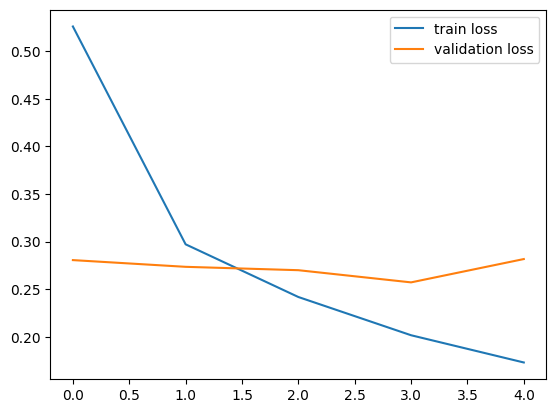

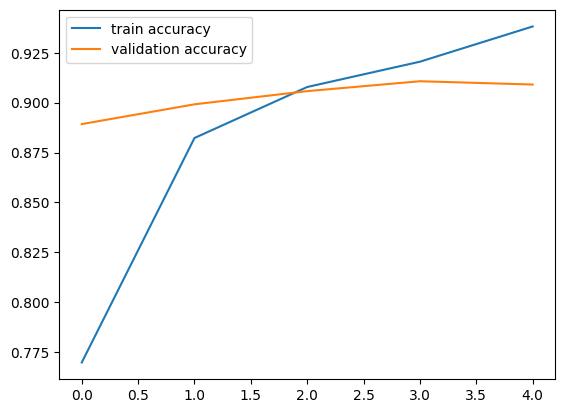

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


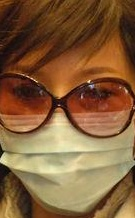

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
[[0.14699392 0.96549547]]
1
The person in the image is wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

In [45]:
# Save the model in .h5 format
model.save('face_mask_detector_model.h5')
print('Model saved as face_mask_detector_model.h5')

Model saved as face_mask_detector_model.h5
